# COVIT-19 Data Analisys

## Get Public DataSets for COVIT-19
Extract last data published

In [6]:
import urllib
import datetime
dt = datetime.datetime.today()
year = dt.strftime('%Y')
month = dt.strftime('%m')
day = dt.strftime('%d')
# Mundial Data
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
url_of_file = f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{year}-{month}-{day}.xlsx'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)

# Mapped Data
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Confirmed.csv'
url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Death.csv'
url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Recovered.csv'
url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)

https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv


('COVIT-19-2020325-Recovered.csv', <http.client.HTTPMessage at 0x7efbfae7ab70>)

## Prepare and Clean Data
Build DataSet to work

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Read Data
dt = datetime.datetime.today()
file = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
df = pd.read_excel(file)

# Prepare Dataset
data = pd.DataFrame(df, columns= ['DateRep', 'Day','Month', 'Year', 'Cases', 'Deaths', 'Countries and territories'])
data = data.rename(columns={"DateRep": "Date", "Countries and territories": "Country"})

# Filter Dataset
data = data[data['Cases'] > 0]
data['Period'] = data['Month']*100+data['Day']
data = data.sort_values(['Country', 'Date'], ascending=[True, True])

# Indexar DataSet
data['Id'] = data.groupby(['Country']).cumcount()

# Sumarizar
ant = data.iloc[0]['Cases']
antd = data.iloc[0]['Deaths']
country = data.iloc[0]['Country']
i = 0
c = []
d = []
for i in range(i, len(data)):
  Cases = (data.iloc[i]['Cases'] + (ant if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Cases']
  Deaths = (data.iloc[i]['Deaths'] + (antd if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Deaths']
  c.append(Cases)
  d.append(Deaths)
  ant = Cases
  antd = Deaths
  country = data.iloc[i]['Country']

data["Total_Cases"] = c
data["Total_Deaths"] = d

data.head()

,Date,Day,Month,Year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths
19,2020-02-25,25,2,2020,1,0,Afghanistan,225,0,1,0
12,2020-03-08,8,3,2020,3,0,Afghanistan,308,1,4,0
11,2020-03-11,11,3,2020,3,0,Afghanistan,311,2,7,0
10,2020-03-15,15,3,2020,3,0,Afghanistan,315,3,10,0
9,2020-03-16,16,3,2020,6,0,Afghanistan,316,4,16,0


# Compare Data Propagation Mexico vs Spain, Italy and EU By days
Compare COVIT-19 propagation in Mexico with Spain, Italy and EU

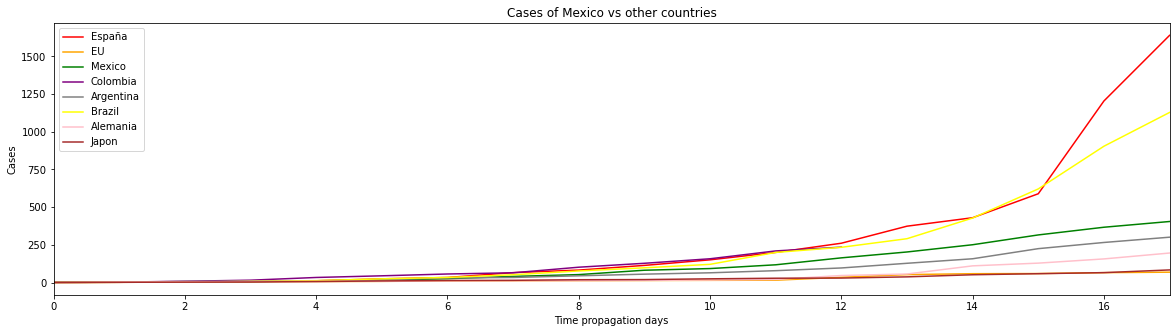

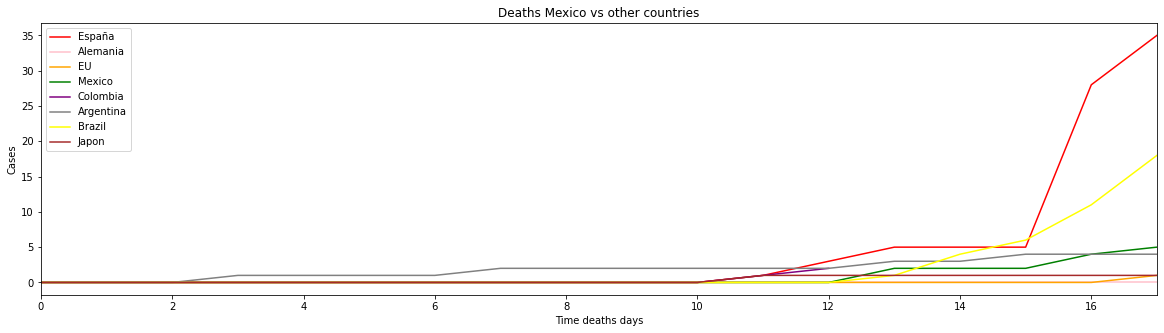

,Date,Day,Month,Year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths
4038,2020-02-29,29,2,2020,2,0,Mexico,229,0,2,0
4037,2020-03-01,1,3,2020,2,0,Mexico,301,1,4,0
4036,2020-03-02,2,3,2020,1,0,Mexico,302,2,5,0
4035,2020-03-09,9,3,2020,2,0,Mexico,309,3,7,0
4034,2020-03-12,12,3,2020,4,0,Mexico,312,4,11,0
4033,2020-03-13,13,3,2020,5,0,Mexico,313,5,16,0
4032,2020-03-14,14,3,2020,10,0,Mexico,314,6,26,0
4031,2020-03-15,15,3,2020,15,0,Mexico,315,7,41,0
4030,2020-03-16,16,3,2020,12,0,Mexico,316,8,53,0
4029,2020-03-17,17,3,2020,29,0,Mexico,317,9,82,0


In [11]:
# Filter by country
mexico = data[(data['Country'] == 'Mexico')]
spain = data[(data['Country'] == 'Spain')]
spain = spain[spain['Id'] < len(mexico) ]
eu = data[(data['Country'] == 'United_States_of_America')]
eu = eu[eu['Id'] < len(mexico) ]
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] < len(mexico) ]
colombia = data[(data['Country'] == 'Colombia')]
colombia = colombia[colombia['Id'] < len(mexico) ]
argentina = data[(data['Country'] == 'Argentina')]
argentina = argentina[argentina['Id'] < len(mexico) ]
brazil = data[(data['Country'] == 'Brazil')]
brazil = brazil[brazil['Id'] < len(mexico) ]
germany = data[(data['Country'] == 'Germany')]
germany = germany[germany['Id'] < len(mexico)]
japan = data[(data['Country'] == 'Japan')]
japan = japan[japan['Id'] < len(mexico)]

#result_compare = mexico.merge(spain, left_on=['Id'], right_on=['Id'], suffixes=('', '_es'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Country_es','Cases_es','Deaths_es','Total_Cases_es','Total_Deaths_es']]
#result_compare = result_compare.merge(eu, left_on=['Id'], right_on=['Id'], suffixes=('', '_eu'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Period_eu','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu']]
#result_compare = result_compare.merge(italy, left_on=['Id'], right_on=['Id'], suffixes=('', '_it'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu','Period_it','Cases_it','Deaths_it','Total_Cases_it','Total_Deaths_it']]

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, title='Cases of Mexico vs other countries', figsize=(20,5), label="España")
#italy.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax)
eu.plot(kind='line', x='Id',y='Total_Cases', color='orange', ax=ax, label="EU")
mexico.plot(kind='line',x='Id',y='Total_Cases', color='green', ax=ax, label="Mexico")
colombia.plot(kind='line',x='Id',y='Total_Cases', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Total_Cases', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Total_Cases', color='yellow', ax=ax, label="Brazil")
germany.plot(kind='line',x='Id',y='Total_Cases', color='pink', ax=ax, label="Alemania")
japan.plot(kind='line',x='Id',y='Total_Cases', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, title='Deaths Mexico vs other countries', figsize=(20,5), label="España")
#italy.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax)
germany.plot(kind='line',x='Id',y='Total_Deaths', color='pink', ax=ax, label="Alemania")
eu.plot(kind='line', x='Id',y='Total_Deaths', color='orange', ax=ax, label="EU")
mexico.plot(kind='line',x='Id',y='Total_Deaths', color='green', ax=ax, label="Mexico")
colombia.plot(kind='line',x='Id',y='Total_Deaths', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Total_Deaths', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Total_Deaths', color='yellow', ax=ax, label="Brazil")
japan.plot(kind='line',x='Id',y='Total_Deaths', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

mexico.head(50)

#result_compare.head(50)

# Future propagation days in other countries

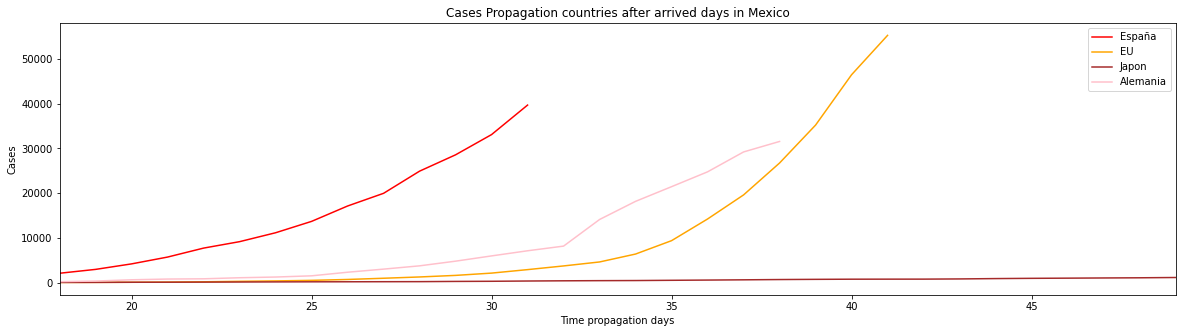

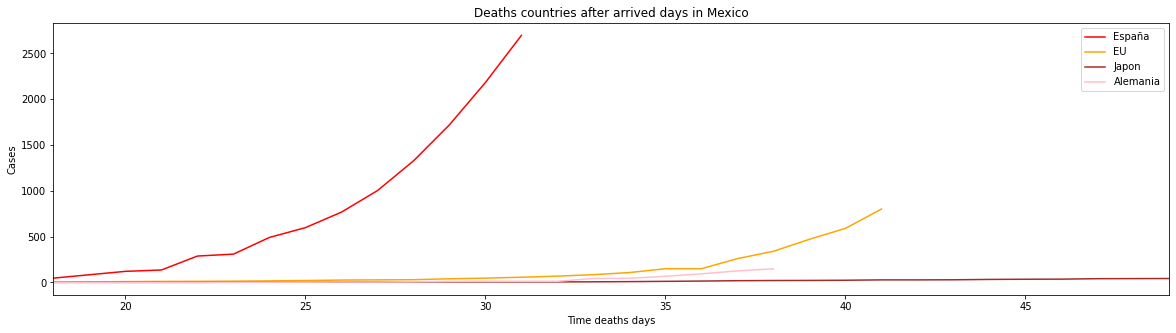

,Date,Day,Month,Year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths
3287,2020-03-10,10,3,2020,1797,98,Italy,310,18,9172,464
3286,2020-03-11,11,3,2020,977,167,Italy,311,19,10149,631
3285,2020-03-12,12,3,2020,2313,196,Italy,312,20,12462,827
3284,2020-03-13,13,3,2020,2651,189,Italy,313,21,15113,1016
3283,2020-03-14,14,3,2020,2547,252,Italy,314,22,17660,1268
3282,2020-03-15,15,3,2020,90,173,Italy,315,23,17750,1441
3281,2020-03-16,16,3,2020,6230,370,Italy,316,24,23980,1811
3280,2020-03-17,17,3,2020,4000,347,Italy,317,25,27980,2158
3279,2020-03-18,18,3,2020,3526,347,Italy,318,26,31506,2505
3278,2020-03-19,19,3,2020,4207,473,Italy,319,27,35713,2978


In [12]:
# Filter by country
spain = data[(data['Country'] == 'Spain')]
spain = spain[spain['Id'] >= len(mexico) ]
eu = data[(data['Country'] == 'United_States_of_America')]
eu = eu[eu['Id'] >= len(mexico) ]
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] >= len(mexico) ]
japan = data[(data['Country'] == 'Japan')]
japan = japan[japan['Id'] >= len(mexico)]
china = data[(data['Country'] == 'China')]
china = china[china['Id'] >= len(mexico)]
german = data[(data['Country'] == 'Germany')]
german = german[german['Id'] >= len(mexico)]

#result_compare = mexico.merge(spain, left_on=['Id'], right_on=['Id'], suffixes=('', '_es'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Country_es','Cases_es','Deaths_es','Total_Cases_es','Total_Deaths_es']]
#result_compare = result_compare.merge(eu, left_on=['Id'], right_on=['Id'], suffixes=('', '_eu'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Period_eu','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu']]
#result_compare = result_compare.merge(italy, left_on=['Id'], right_on=['Id'], suffixes=('', '_it'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu','Period_it','Cases_it','Deaths_it','Total_Cases_it','Total_Deaths_it']]

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, title='Cases Propagation countries after arrived days in Mexico', figsize=(20,5), label="España")
#italy.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, label="Italia")
eu.plot(kind='line', x='Id',y='Total_Cases', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Total_Cases', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Total_Cases', color='pink', ax=ax, label="Alemania")
#china.plot(kind='line',x='Id',y='Total_Cases', color='gray', ax=ax, label="China")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, title='Deaths countries after arrived days in Mexico', figsize=(20,5), label="España")
#italy.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, label="Italia")
eu.plot(kind='line', x='Id',y='Total_Deaths', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Total_Deaths', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Total_Deaths', color='pink', ax=ax, label="Alemania")
#china.plot(kind='line',x='Id',y='Total_Deaths', color='gray', ax=ax, label="China")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

italy.head(50)

#result_compare.head(50)

# Worse of Cases

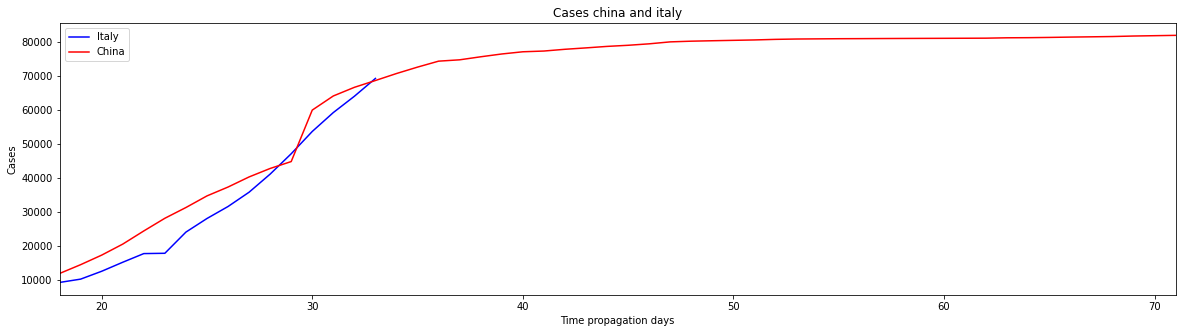

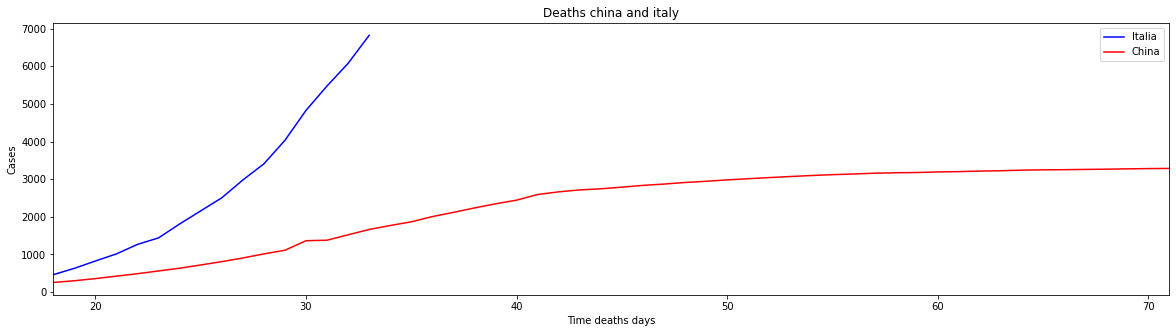

,Date,Day,Month,Year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths
3287,2020-03-10,10,3,2020,1797,98,Italy,310,18,9172,464
3286,2020-03-11,11,3,2020,977,167,Italy,311,19,10149,631
3285,2020-03-12,12,3,2020,2313,196,Italy,312,20,12462,827
3284,2020-03-13,13,3,2020,2651,189,Italy,313,21,15113,1016
3283,2020-03-14,14,3,2020,2547,252,Italy,314,22,17660,1268
3282,2020-03-15,15,3,2020,90,173,Italy,315,23,17750,1441
3281,2020-03-16,16,3,2020,6230,370,Italy,316,24,23980,1811
3280,2020-03-17,17,3,2020,4000,347,Italy,317,25,27980,2158
3279,2020-03-18,18,3,2020,3526,347,Italy,318,26,31506,2505
3278,2020-03-19,19,3,2020,4207,473,Italy,319,27,35713,2978


In [14]:
# Filter by country
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] >= len(mexico) ]
china = data[(data['Country'] == 'China')]
china = china[china['Id'] >= len(mexico) ]

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, title='Cases china and italy', figsize=(20,5), label="Italy")
china.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, label="China")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, title='Deaths china and italy', figsize=(20,5), label="Italia")
china.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, label="China")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

italy.head(50)

#result_compare.head(50)

## Evolution of the Virus
Next days virus propagation

In [0]:
# Building

# Test for build interactive Dashboard

In [0]:
from IPython.display import display
from IPython.html.widgets import *
from ipywidgets import widgets

text = widgets.Text()
display(text)

def handle_submit(sender):
  print(text.value)

text.on_submit(handle_submit)

def f(x):
  print(x)

interact(f,x=10)